<div style="text-align: center;">
    <img src="weather_poster.png" alt="Image" width="1500">
</div>

<h1 style="text-align: center;">WEATHER PREDICTION FOR THE CITY OF CALGARY</h1>


In [78]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
calgary_weather_df = pd.read_csv(r"C:\Users\hthakur2\OneDrive - Teck Resources Limited\Documents\Calgary Weather Prediction\calgary_data.csv", skiprows=3)
calgary_weather_df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),surface_pressure (hPa),precipitation (mm),snowfall (cm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h)
0,2021-04-01T00:00,-0.3,63,-4.6,890.0,0.0,0.0,1,49,9.1
1,2021-04-01T01:00,0.4,55,-3.9,889.7,0.0,0.0,2,66,8.9
2,2021-04-01T02:00,0.3,56,-4.0,888.9,0.0,0.0,1,39,8.7
3,2021-04-01T03:00,-0.5,60,-4.9,887.6,0.0,0.0,1,41,8.9
4,2021-04-01T04:00,-0.8,63,-5.5,886.2,0.0,0.0,2,75,11.6


### Counting the number of null columns in each variable

In [80]:
null_count_column = calgary_weather_df.isnull().sum()
print(null_count_column)

time                         0
temperature_2m (°C)          0
relativehumidity_2m (%)      0
apparent_temperature (°C)    0
surface_pressure (hPa)       0
precipitation (mm)           0
snowfall (cm)                0
weathercode (wmo code)       0
cloudcover (%)               0
windspeed_10m (km/h)         0
dtype: int64


## PERFORMING EXPLOREATORY DATA ANALYSIS 

### Checking the Data Type of all the variables in the dataset

In [81]:
print(calgary_weather_df.dtypes)

time                          object
temperature_2m (°C)          float64
relativehumidity_2m (%)        int64
apparent_temperature (°C)    float64
surface_pressure (hPa)       float64
precipitation (mm)           float64
snowfall (cm)                float64
weathercode (wmo code)         int64
cloudcover (%)                 int64
windspeed_10m (km/h)         float64
dtype: object


### Loading the Statistics of the dataset variables- Count, Mean, Standard Deviation, Min, 25%, 50%, 75%, and Max

In [82]:
print(calgary_weather_df.describe())


       temperature_2m (°C)  relativehumidity_2m (%)  \
count         18690.000000             18690.000000   
mean              4.493387                63.828036   
std              12.498344                19.948754   
min             -35.700000                12.000000   
25%              -3.100000                50.000000   
50%               4.800000                66.000000   
75%              13.900000                79.000000   
max              35.800000               100.000000   

       apparent_temperature (°C)  surface_pressure (hPa)  precipitation (mm)  \
count               18690.000000            18690.000000        18690.000000   
mean                    1.025233              892.543307            0.051926   
std                    13.865758                7.759775            0.236782   
min                   -41.200000              859.100000            0.000000   
25%                    -7.800000              887.700000            0.000000   
50%                     

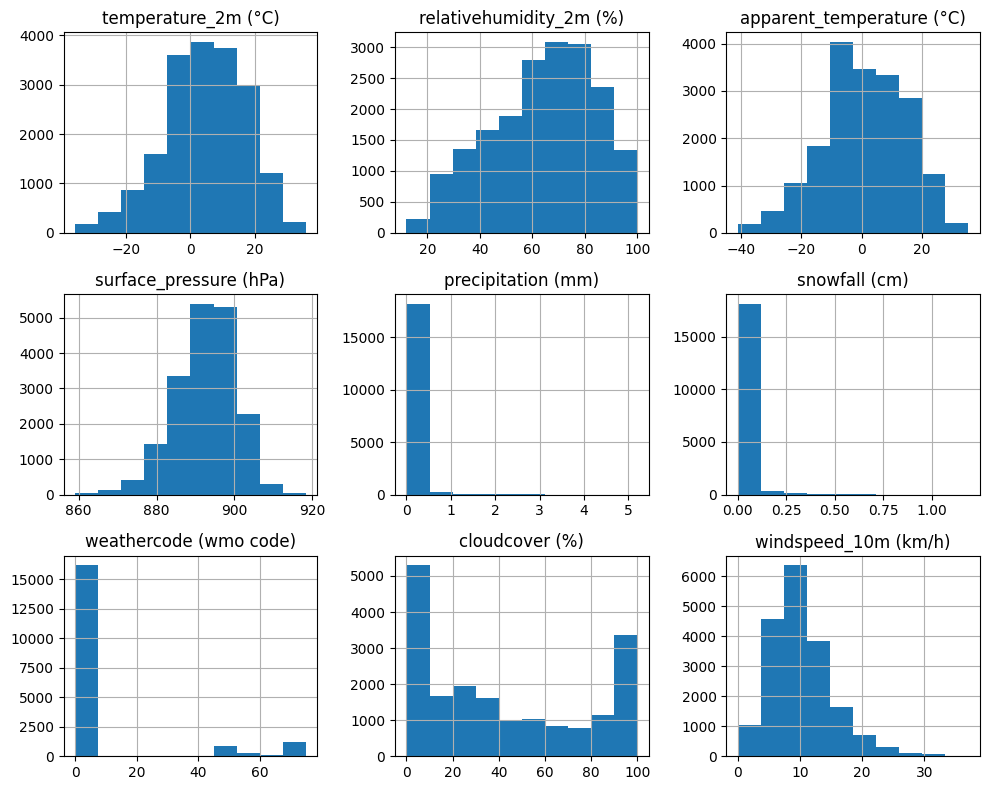

In [83]:
# Plot histograms of the variables
calgary_weather_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

C:\Users\hthakur2\AppData\Local\Temp\ipykernel_33124\854768830.py:44: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



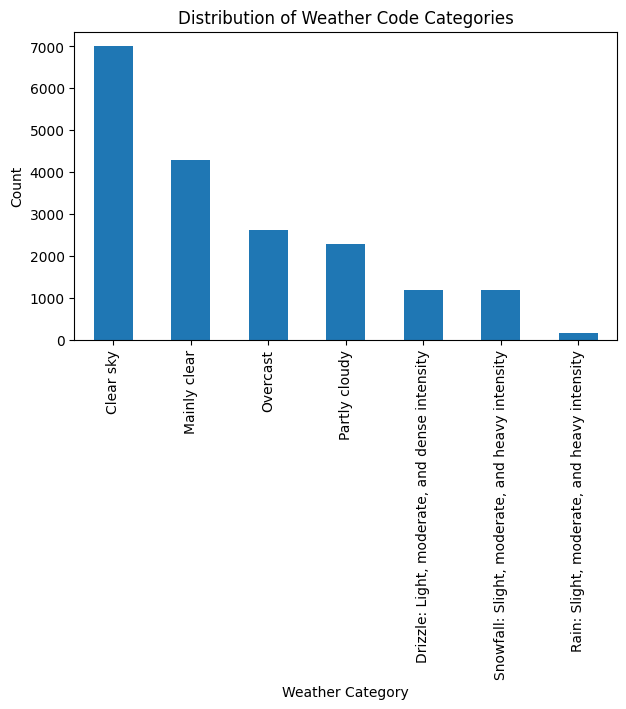

In [84]:
def categorize_weather_code(code):
    if code == 0:
        return 'Clear sky'
    elif code == 1:
        return 'Mainly clear'
    elif code == 2:
        return 'Partly cloudy'
    elif code == 3:
        return 'Overcast'
    elif code in [45, 48]:
        return 'Fog and depositing rime fog'
    elif code in [51, 53, 55]:
        return 'Drizzle: Light, moderate, and dense intensity'
    elif code in [56, 57]:
        return 'Freezing drizzle: Light and dense intensity'
    elif code in [61, 63, 65]:
        return 'Rain: Slight, moderate, and heavy intensity'
    elif code in [66, 67]:
        return 'Freezing rain: Light and heavy intensity'
    elif code in [71, 73, 75]:
        return 'Snowfall: Slight, moderate, and heavy intensity'
    elif code == 77:
        return 'Snow grains'
    elif code in [80, 81, 82]:
        return 'Rain showers: Slight, moderate, and violent'
    elif code in [85, 86]:
        return 'Snow showers: Slight and heavy'
    elif code == 95:
        return 'Thunderstorm: Slight or moderate'
    elif code in [96, 99]:
        return 'Thunderstorm with slight and heavy hail'
    else:
        return 'Unknown'

# Apply the categorization to the weather code column
calgary_weather_df['weather_category'] = calgary_weather_df['weathercode (wmo code)'].apply(categorize_weather_code)

# Plot a bar plot of the weather code categories
plt.figure(figsize=(7, 4))
calgary_weather_df['weather_category'].value_counts().plot(kind='bar')
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.title('Distribution of Weather Code Categories')
plt.tight_layout()
plt.show()

### Checking the Temperature Distribution

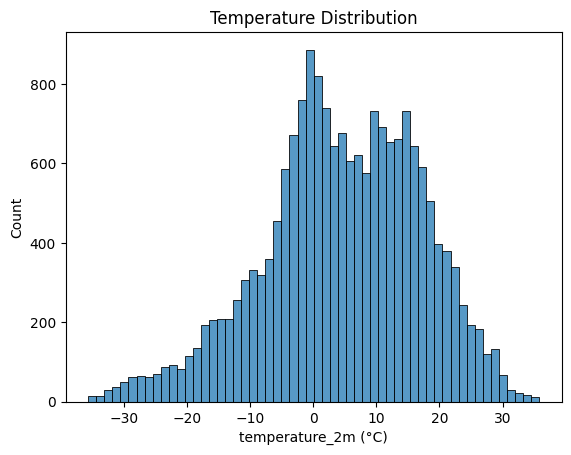

In [85]:
sns.histplot(data= calgary_weather_df, x='temperature_2m (°C)')
plt.title('Temperature Distribution')
plt.show()

### Plotting the relations between temperature and other variables that affect temperature

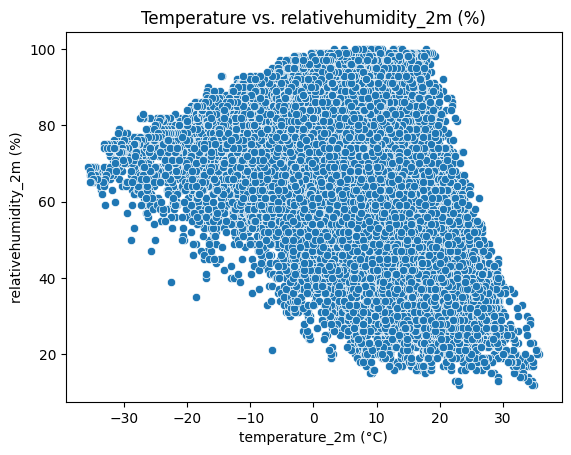

KeyboardInterrupt: 

In [86]:
# Perform EDA on the variables
variables = ['relativehumidity_2m (%)', 'apparent_temperature (°C)', 'surface_pressure (hPa)',
             'precipitation (mm)', 'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)']

for variable in variables:
    sns.scatterplot(data=calgary_weather_df, x='temperature_2m (°C)', y=variable)
    plt.title(f'Temperature vs. {variable}')
    plt.show()

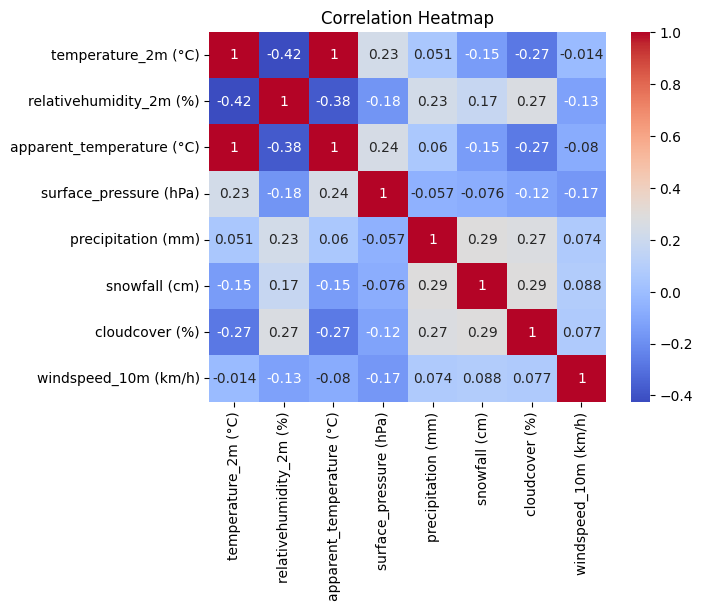

In [ ]:
corr_matrix = calgary_weather_df[['temperature_2m (°C)', 'relativehumidity_2m (%)', 'apparent_temperature (°C)', 'surface_pressure (hPa)',
                   'precipitation (mm)', 'snowfall (cm)','cloudcover (%)', 'windspeed_10m (km/h)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In the above corelation heatmap, we can see correlation between temperature and other variables. In this project, our goal is to predict weather, and the biggest indicator of weather is temperature. Therefore, our target variable is temperature in this project, whereas other variables act as the variables which affect the temperature. 

In the analysis above, we can see that some variables have positive corelation with temperature, whereas some variables have negative correlation with temperature. 
The variables which have positive correlation (with highest being placed first) are: Surface pressure and precipitation. With the increase of value in these two variables, the temperature increases. 

However, if we look at all the other variables here, they tend to have a negative correlation with temperature. That means as these other variables gain more value, the temperature tends to drop. For example- the variable relative humidity has a **strong negative correlation** with temperature which indicates that as relative humidity increases, temperature decreases. 

<h3> PREPORESSING DATA FOR THE MODEL </h3>

In [87]:
x = calgary_weather_df[['relativehumidity_2m (%)', 'apparent_temperature (°C)', 'surface_pressure (hPa)', 'precipitation (mm)',
                        'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)']]
y = calgary_weather_dfy = calgary_weather_df[['temperature_2m (°C)', 'weathercode (wmo code)']]


In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Comparing Model Performances ##

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate the performance metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Linear Regression:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

Linear Regression:
Root Mean Squared Error (RMSE): 6.87779373851466
Mean Squared Error (MSE): 87.34864478188048
Mean Absolute Error (MAE): 4.133998725252774
Coefficient of Determination (R-squared): 0.7931480115453581


In [90]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("XGBoost:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)

XGBoost:
Root Mean Squared Error (RMSE): 0.1739196238165296
Mean Squared Error (MSE): 0.04029333482467832
Mean Absolute Error (MAE): 0.1001193104864714
Coefficient of Determination (R-squared): 0.9997549358700789


In [91]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Coefficient of Determination (R-squared):", r2_rf)


Random Forest:
Root Mean Squared Error (RMSE): 0.2867666225752016
Mean Squared Error (MSE): 0.08613112145532403
Mean Absolute Error (MAE): 0.13481273408239658
Coefficient of Determination (R-squared): 0.99955339693965


In [92]:
from tabulate import tabulate

# Create a dictionary with the performance metrics
performance_data = {
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest'],
    'RMSE': [6.8777, 0.1739, 0.2687],
    'MSE': [87.3486, 0.0402, 0.0790],
    'MAE': [4.1339, 0.1001, 0.1348],
    'R-squared': [0.7931, 0.9997, 0.9995]
}

# Create a pandas DataFrame using the performance data
performance_df = pd.DataFrame(performance_data)

# Set the 'Model' column as the index
performance_df.set_index('Model', inplace=True)

# Convert the DataFrame to a formatted table string
table_string = tabulate(performance_df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table_string)


╒═══════════════════╤════════╤═════════╤════════╤═════════════╕
│ Model             │   RMSE │     MSE │    MAE │   R-squared │
╞═══════════════════╪════════╪═════════╪════════╪═════════════╡
│ Linear Regression │ 6.8777 │ 87.3486 │ 4.1339 │      0.7931 │
├───────────────────┼────────┼─────────┼────────┼─────────────┤
│ XGBoost           │ 0.1739 │  0.0402 │ 0.1001 │      0.9997 │
├───────────────────┼────────┼─────────┼────────┼─────────────┤
│ Random Forest     │ 0.2687 │  0.079  │ 0.1348 │      0.9995 │
╘═══════════════════╧════════╧═════════╧════════╧═════════════╛


<h4> Model Analysis Summary: </h4>

From the above table, we can see the performance of the three models that we used our data set against- Linear Regression, XGBoost, and Random Forest.
We used four different criterias such as Root Mean Squared Error, Mean Squared Error, and R-Squared, and upon analyzing the numbers, it is clear that Linear Regression has far less performance than the other two models.
While choosing between, Random Forest and XGBoost, and we can say that the best performing model above is XGBoost as it has a lesser RMSE, MSE, MAE, and higher R-squared value. 

Therefore, I will be proceeding with XGBoost model for predictions ahead.

<h4> Analyzing the Feature Importances

In [ ]:
# Feature Importance Analysis
importances = model.feature_importances_
feature_importances = list(zip(features, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for features, importance in feature_importances:
    print(f"{features}: {importance}")

Feature Importances:
snowfall (cm): 0.6834670777590656
surface_pressure (hPa): 0.2430295257289164
cloudcover (%): 0.07020719518631585
windspeed_10m (km/h): 0.0016648841639777452
relativehumidity_2m (%): 0.0008642994080784288
apparent_temperature (°C): 0.0007031508057093126
precipitation (mm): 6.386694793664533e-05


<h4> Hyperparameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_child_weight': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set the best hyperparameters
best_hyperparameters = {'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}

# Instantiate the XGBRegressor model with the best hyperparameters
best_model = xgb.XGBRegressor(
    max_depth=best_hyperparameters['max_depth'],
    min_child_weight=best_hyperparameters['min_child_weight'],
    n_estimators=best_hyperparameters['n_estimators']
)

# Fit the model on the training data
best_model.fit(x_train, y_train)

# Predict the target variable using the trained model
y_pred_best = best_model.predict(x_test)

# Evaluate the model with the best hyperparameters
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the evaluation metrics
print("XGBoost with Best Hyperparameters:")
print("Root Mean Squared Error (RMSE):", rmse_best)
print("Mean Squared Error (MSE):", mse_best)
print("Mean Absolute Error (MAE):", mae_best)
print("Coefficient of Determination (R-squared):", r2_best)

XGBoost with Best Hyperparameters:
Root Mean Squared Error (RMSE): 0.1687261018412928
Mean Squared Error (MSE): 0.037426223942498574
Mean Absolute Error (MAE): 0.09369123470293347
Coefficient of Determination (R-squared): 0.9997732587122964


In [ ]:
hyperparameter_comarison_data = {
    'Model': ['XGBoost' , 'XGBoost with Hyperparameter'],
    'RMSE': [0.1739, 0.1687],
    'MSE': [0.0402, 0.0374],
    'MAE': [0.1001, 0.0936],
    'R-squared': [0.9997, 0.9997]
}

# Create a pandas DataFrame using the performance data
hp_performance_df = pd.DataFrame(hyperparameter_comarison_data)

# Set the 'Model' column as the index
hp_performance_df.set_index('Model', inplace=True)

# Convert the DataFrame to a formatted table string
table_string = tabulate(hp_performance_df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table_string)

╒═════════════════════════════╤════════╤════════╤════════╤═════════════╕
│ Model                       │   RMSE │    MSE │    MAE │   R-squared │
╞═════════════════════════════╪════════╪════════╪════════╪═════════════╡
│ XGBoost                     │ 0.1739 │ 0.0402 │ 0.1001 │      0.9997 │
├─────────────────────────────┼────────┼────────┼────────┼─────────────┤
│ XGBoost with Hyperparameter │ 0.1687 │ 0.0374 │ 0.0936 │      0.9997 │
╘═════════════════════════════╧════════╧════════╧════════╧═════════════╛


We can see from the table above that XGBoost with Hyperparameter tuning is giving better performance than the previous XGBoost model. 
Thus, I will be using the XGBoost model ahead with hypertuned parameters.

In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
import numpy as np
cross_val_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = np.mean(cross_val_scores)
mse = -mean_mse
print("Mean Squared Error (CV):", mse)

Mean Squared Error (CV): 0.038612548954943315


In [93]:
# Model Deployment
import joblib
joblib.dump(best_model, 'best_model_xgb_hp.pkl')
loaded_model = joblib.load('best_model_xgb_hp.pkl')
predictions = loaded_model.predict(x_test)

In [ ]:
import requests
import pyodbc
from datetime import datetime

def fetch_and_store_data():
    url = "https://api.open-meteo.com/v1/forecast?latitude=51.05&longitude=-114.09&hourly=temperature_2m,relativehumidity_2m,surface_pressure,precipitation,snowfall,cloudcover,windspeed_10m,apparent_temperature"
    response = requests.get(url)
    print("Response status code:", response.status_code)
    print("Response content:", response.content)
    
    try:
        # Parse the JSON response into the data variable
        data = response.json()

        # Print the entire data dictionary for analysis
        print("API response:", data)

        # Extract the relevant variables from the API response
        if 'hourly' in data:
            timestamps = data['hourly']['time']
            temperatures = data['hourly']['temperature_2m']
            relative_humidity = data['hourly']['relativehumidity_2m']
            surface_pressure = data['hourly']['surface_pressure']
            precipitation = data['hourly']['precipitation']
            snowfall = data['hourly']['snowfall']
            cloud_cover = data['hourly']['cloudcover']
            windspeed = data['hourly']['windspeed_10m']
            apparent_temperature = data['hourly']['apparent_temperature']

            # Connect to the SQL Server database
            connection_string = "Driver=ODBC Driver 17 for SQL Server; Server=tcp:calgaryweatherserver.database.windows.net; Database=weather_data;Uid=weatheradmin;Pwd=Password123;"
            connection = pyodbc.connect(connection_string)
            cursor = connection.cursor()

            # Insert each row of data into the SQL table
            for i in range(len(timestamps)):
                # Convert the timestamp string to a datetime object
                timestamp = datetime.strptime(timestamps[i], "%Y-%m-%dT%H:%M")

                # Convert other values to the appropriate data types if needed
                temperature = int(temperatures[i])
                relative_humidity_value = int(relative_humidity[i])
                surface_pressure_value = float(surface_pressure[i])
                precipitation_value = float(precipitation[i])
                snowfall_value = float(snowfall[i])
                cloud_cover_value = int(cloud_cover[i])
                wind_speed_value = float(windspeed[i])
                apparent_temperature_value = int(apparent_temperature[i])

                # Prepare the data for insertion into the SQL table
                data_row = (timestamp, temperature, relative_humidity_value, surface_pressure_value, precipitation_value, snowfall_value, cloud_cover_value, wind_speed_value, apparent_temperature_value)

                # Insert the data into the SQL table
                query = "INSERT INTO CalgaryWeatherData (Timestamp, Temperature, RelativeHumidity, SurfacePressure, Precipitation, Snowfall, CloudCover, WindSpeed, ApparentTemperature) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)"
                cursor.execute(query, data_row)
                connection.commit()

            print("Data inserted successfully.")
        else:
            print("No 'hourly' data found in the API response.")

    except KeyError as e:
        print("KeyError:", e)

    except Exception as e:
        print("Error:", e)

    finally:
        # Close the database connection
        if 'cursor' in locals():
            cursor.close()
        if 'connection' in locals():
            connection.close()

# Call the function to fetch and store the data
fetch_and_store_data()


Response status code: 200
Response content: b'{"latitude":51.054447,"longitude":-114.07634,"generationtime_ms":0.3070831298828125,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":1051.0,"hourly_units":{"time":"iso8601","temperature_2m":"\xc2\xb0C","relativehumidity_2m":"%","surface_pressure":"hPa","precipitation":"mm","snowfall":"cm","cloudcover":"%","windspeed_10m":"km/h","apparent_temperature":"\xc2\xb0C"},"hourly":{"time":["2023-08-18T00:00","2023-08-18T01:00","2023-08-18T02:00","2023-08-18T03:00","2023-08-18T04:00","2023-08-18T05:00","2023-08-18T06:00","2023-08-18T07:00","2023-08-18T08:00","2023-08-18T09:00","2023-08-18T10:00","2023-08-18T11:00","2023-08-18T12:00","2023-08-18T13:00","2023-08-18T14:00","2023-08-18T15:00","2023-08-18T16:00","2023-08-18T17:00","2023-08-18T18:00","2023-08-18T19:00","2023-08-18T20:00","2023-08-18T21:00","2023-08-18T22:00","2023-08-18T23:00","2023-08-19T00:00","2023-08-19T01:00","2023-08-19T02:00","2023-08-19T03:00","2023

In [ ]:
import pandas as pd
import sqlalchemy
import joblib
import numpy as np

# Load the trained ML model
best_model = joblib.load(r"C:\Users\hthakur2\OneDrive - Teck Resources Limited\Documents\Calgary Weather Prediction\best_model_xgb_hp.pkl")

# Define the mapping between SQL column names and feature names
column_to_feature_mapping = {
    'RelativeHumidity': 'relativehumidity_2m (%)',
    'ApparentTemperature': 'apparent_temperature (°C)',
    'SurfacePressure': 'surface_pressure (hPa)',
    'Precipitation': 'precipitation (mm)',
    'Snowfall': 'snowfall (cm)',
    'CloudCover': 'cloudcover (%)',
    'WindSpeed': 'windspeed_10m (km/h)'
}

def categorize_weather_code(code):
    if code == 0:
        return 'Clear sky'
    elif code == 1:
        return 'Mainly clear'
    elif code == 2:
        return 'Partly cloudy'
    elif code == 3:
        return 'Overcast'
    elif code in [45, 48]:
        return 'Fog and depositing rime fog'
    elif code in [51, 53, 55]:
        return 'Drizzle: Light, moderate, and dense intensity'
    elif code in [56, 57]:
        return 'Freezing drizzle: Light and dense intensity'
    elif code in [61, 63, 65]:
        return 'Rain: Slight, moderate, and heavy intensity'
    elif code in [66, 67]:
        return 'Freezing rain: Light and heavy intensity'
    elif code in [71, 73, 75]:
        return 'Snowfall: Slight, moderate, and heavy intensity'
    elif code == 77:
        return 'Snow grains'
    elif code in [80, 81, 82]:
        return 'Rain showers: Slight, moderate, and violent'
    elif code in [85, 86]:
        return 'Snow showers: Slight and heavy'
    elif code == 95:
        return 'Thunderstorm: Slight or moderate'
    elif code in [96, 99]:
        return 'Thunderstorm with slight and heavy hail'
    else:
        return 'Unknown'



# Define the function to fetch the data from the SQL table and make predictions
def fetch_data_and_make_predictions():
    # Connect to the Azure SQL Database
    server = 'calgaryweatherserver.database.windows.net'
    database = 'weather_data'
    username = 'weatheradmin'
    password = 'Password123'
    driver = 'ODBC Driver 17 for SQL Server'

    conn_str = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'
    engine = sqlalchemy.create_engine(conn_str)

    try:
        # Fetch the last 168 rows of data for input variables from the Azure SQL Database table
        query = """
        SELECT TOP 168
               [Timestamp]
              ,[Temperature]
              ,[RelativeHumidity]
              ,[SurfacePressure]
              ,[Precipitation]
              ,[Snowfall]
              ,[CloudCover]
              ,[WindSpeed]
              ,[ApparentTemperature]
        FROM [dbo].[CalgaryWeatherData]
        WHERE [Timestamp] IS NOT NULL
          AND [Temperature] IS NOT NULL
          AND [RelativeHumidity] IS NOT NULL
          AND [SurfacePressure] IS NOT NULL
          AND [Precipitation] IS NOT NULL
          AND [Snowfall] IS NOT NULL
          AND [CloudCover] IS NOT NULL
          AND [WindSpeed] IS NOT NULL
          AND [ApparentTemperature] IS NOT NULL
        ORDER BY [Timestamp] DESC;
        """

        df = pd.read_sql(query, engine)

        # Remove duplicate rows based on Timestamp column
        #df.drop_duplicates(subset='Timestamp', keep='last', inplace=True)

        # Map the column names in the SQL table to feature names
        df.rename(columns=column_to_feature_mapping, inplace=True)

        # Use the correct order of features as defined in the features list
        features = ['relativehumidity_2m (%)', 'apparent_temperature (°C)', 'surface_pressure (hPa)', 'precipitation (mm)', 'snowfall (cm)', 'cloudcover (%)', 'windspeed_10m (km/h)']

        # Reorder the DataFrame columns to match the order of features

        # Prepare the input data for making predictions
        X = df[features].values  # Use all columns as features

        # Make predictions using the ML model
        predictions = best_model.predict(X)

        # Update the DataFrame with the predictions
        df['predicted_temperature'] = np.round(predictions[:, 0]).astype(int)
        df['weathercode'] = np.round(predictions[:, 1]).astype(int)

        # Update the existing rows in the SQL table with the predicted temperature and weather code
        # Update the existing rows in the SQL table with the predicted temperature and weather code
        # Update the existing rows in the SQL table with the predicted temperature and weather code
        for i in range(len(df)):
            timestamp = df.loc[i, 'Timestamp']
            predicted_temperature = df.loc[i, 'predicted_temperature']
            weather_code = df.loc[i, 'weathercode']
            condition = categorize_weather_code(weather_code)
            df.loc[i, 'condition'] = condition  # Add the 'condition' column to the DataFrame

            update_query = f"UPDATE CalgaryWeatherData SET PredictedTemperature = {predicted_temperature}, WeatherCode = {weather_code}, Conditions = '{condition}' WHERE Timestamp = '{timestamp}'"
            engine.execute(update_query)

        # Print the predictions along with relevant columns
        print(df[['Timestamp', 'predicted_temperature', 'weathercode', 'condition']])


       
    except Exception as e:
        print("Error:", e)
        import traceback
        traceback.print_exc()

    finally:
        # Close the connection
        engine.dispose()

# Call the function to fetch the data and make predictions
fetch_data_and_make_predictions()


In [ ]:
@app.callback(
    Output("output-container", "children"),
    [Input("generate-button", "n_clicks")]
)
def generate_weather(n_clicks):
    if n_clicks > 0:
        fetch_and_store_data()
        make_predictions()

        # Fetch the predictions from the Azure SQL Database table
        query = "SELECT Timestamp, PredictedTemperature, WeatherCode FROM CalgaryWeatherData"
        predictions_df = pd.read_sql(query, engine)

        # Display the predictions on the dashboard
        return html.Table([
            html.Thead(html.Tr([html.Th("Timestamp"), html.Th("Predicted Temperature"), html.Th("Weather Code")])),
            html.Tbody([
                html.Tr([html.Td(timestamp), html.Td(predicted_temperature), html.Td(weather_code)])
                for timestamp, predicted_temperature, weather_code in zip(predictions_df['Timestamp'], predictions_df['PredictedTemperature'], predictions_df['WeatherCode'])
            ])
        ])

    return ""

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(
    [
        html.H1("Weather Dashboard", className="header-title"),
        dbc.Button("Show 7 Days Weather", id="show-data-button", color="primary", className="mt-3"),
        html.Div(id="data-display", className="mt-4"),
    ],
    className="main-container",
)

@app.callback(
    Output("data-display", "children"),
    Input("show-data-button", "n_clicks"),
)
def show_data(n_clicks):
    if n_clicks is None:
        return html.Div()  # No data to display initially
    
    # Add your data fetching and processing code here
    # ...

    # You can modify the output data to be displayed as a table, chart, or any other format
    output_data = df.to_html(index=False)  # Example: Display DataFrame as an HTML table
    
    return html.Div([
        html.H2("7 Days Weather Data", className="data-title"),
        dcc.Markdown(output_data),
    ])

if __name__ == "__main__":
    app.run_server(debug=True)


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import requests
import pyodbc
import pandas as pd
import joblib

# Load the ML model
model = joblib.load(r"C:\Users\hthakur2\OneDrive - Teck Resources Limited\Documents\Calgary Weather Prediction\best_model_xgb_hp.pkl")

# Initialize the Dash app
app = dash.Dash(__name__)

# Set up the layout of the dashboard
app.layout = html.Div([
    html.H1("Weather Generator Dashboard"),
    html.Button("Generate Weather", id="generate-button", n_clicks=0),
    html.Div(id="output-container")
])


